In [1]:
#install the package
! pip install git+https://github.com/weecology/deepforest.git@refs/pull/240/head

  Cloning https://github.com/weecology/deepforest.git (to revision refs/pull/240/head) to /tmp/pip-req-build-ni0hruyj
  Running command git clone -q https://github.com/weecology/deepforest.git /tmp/pip-req-build-ni0hruyj
  Running command git fetch -q https://github.com/weecology/deepforest.git refs/pull/240/head
  Running command git checkout -q a66f0fe05edcba4732c2be005e4b4478fbbac9a6
     |████████████████████████████████| 28.5 MB 53 kB/s 
     |████████████████████████████████| 994 kB 48.3 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 994 kB 87.8 MB/s 
     |████████████████████████████████| 916 kB 59.2 MB/s 
     |████████████████████████████████| 29.6 MB 26 kB/s 
     |████████████████████████████████| 631 kB 78.6 MB/s 
     |████████████████████████████████| 6.6 MB 11.9 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 272 kB 89.2 MB/s 
     |███████████████████████████

In [2]:
!pip install albumentations==0.4.6
import albumentations 


     |████████████████████████████████| 117 kB 7.2 MB/s 
     |████████████████████████████████| 948 kB 60.9 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65172 sha256=2d7da5f7b02554dab27a073701aa622987d7e5deb647e7d9a1d31cea682f6119
  Stored in directory: /root/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc
Successfully built albumentations
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.6
    Uninstalling imgaug-0.2.6:
      Successfully uninstalled imgaug-0.2.6
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [3]:
from albumentations.pytorch import ToTensorV2

In [4]:
from deepforest import main
from deepforest import get_data
import os
import matplotlib.pyplot as plt
model = main.deepforest()
model.use_release()



Reading config file: /usr/local/lib/python3.7/dist-packages/deepforest/data/deepforest_config.yml


Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth


  0%|          | 0.00/130M [00:00<?, ?B/s]

NEON.pt: 129MB [00:02, 62.7MB/s]                           


Model was downloaded and saved to /usr/local/lib/python3.7/dist-packages/deepforest/data/NEON.pt
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


In [6]:
from deepforest import main
from deepforest import get_data
import os
import matplotlib.pyplot as plt
model = main.deepforest()
model.use_release()

Reading config file: /usr/local/lib/python3.7/dist-packages/deepforest/data/deepforest_config.yml
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
  0%|          | 0/15 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/deepforest/predict.py:34: UserWarning: Image type is {}, transforming to float32. This assumes that the range of pixel values is 0-255, as opposed to 0-1.To suppress this warning, transform image (image.astype('float32')
  warnings.warn("Image type is {}, transforming to float32. This assumes that the range of pixel values is 0-255, as opposed to 0-1.To suppress this warning, transform image (image.astype('float32')")
100%|██████████| 15/15 [00:43<00:00,  2.87s/it]

273 predictions in overlapping windows, applying non-max supression
197 predictions kept after non-max suppression


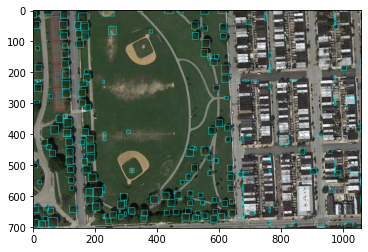

In [9]:
raster_path = get_data("/content/094.jpg")
# Window size of 300px with an overlap of 25% among windows for this small tile.
predicted_raster = model.predict_tile(raster_path, return_plot = True, patch_size=300,patch_overlap=0.25)
plt.imshow(predicted_raster[:,:,::-1])

/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
  0%|          | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/deepforest/predict.py:34: UserWarning: Image type is {}, transforming to float32. This assumes that the range of pixel values is 0-255, as opposed to 0-1.To suppress this warning, transform image (image.astype('float32')
  warnings.warn("Image type is {}, transforming to float32. This assumes that the range of pixel values is 0-255, as opposed to 0-1.To suppress this warning, transform image (image.astype('float32')")
100%|██████████| 6/6 [00:17<00:00,  2.98s/it]

132 predictions in overlapping windows, applying non-max supression
65 predictions kept after non-max suppression


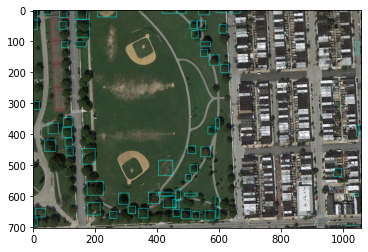

In [10]:
raster_path = get_data("/content/094.jpg")
# Window size of 600px with an overlap of 25% among windows for this small tile.
predicted_raster = model.predict_tile(raster_path, return_plot = True, patch_size=600,patch_overlap=0.25)
plt.imshow(predicted_raster[:,:,::-1])

/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
  0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/deepforest/predict.py:34: UserWarning: Image type is {}, transforming to float32. This assumes that the range of pixel values is 0-255, as opposed to 0-1.To suppress this warning, transform image (image.astype('float32')
  warnings.warn("Image type is {}, transforming to float32. This assumes that the range of pixel values is 0-255, as opposed to 0-1.To suppress this warning, transform image (image.astype('float32')")
100%|██████████| 2/2 [00:08<00:00,  4.02s/it]

29 predictions in overlapping windows, applying non-max supression
23 predictions kept after non-max suppression


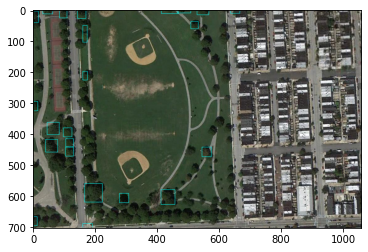

In [11]:
raster_path = get_data("/content/094.jpg")
# Window size of 900px with an overlap of 25% among windows for this small tile.
predicted_raster = model.predict_tile(raster_path, return_plot = True, patch_size=900,patch_overlap=0.25)
plt.imshow(predicted_raster[:,:,::-1])